In [61]:
import pandas as pd
import json
from sklearn.linear_model import LinearRegression
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

import glob

In [ ]:
data_dir = './data/'

In [62]:
results_dir = data_dir + 'large-public-subsets/results'

In [63]:
os.listdir(results_dir)

['merged-results.json']

In [64]:
df_files = glob.glob(os.path.join(results_dir, '*.json'))

In [65]:
df_files = [
    ('merged-results.json', 'tuple()')
]

In [66]:
def parse_df(fp, q):
    df = pd.DataFrame(json.load(open(os.path.join(results_dir, fp))))
    df['sample_size'] = df['sample_size'].astype(int)
    df = df.query(q)
    return df

In [67]:
df = pd.concat([parse_df(fp, q) for fp, q in df_files])

In [68]:
df.columns

Index(['otu_size', 'sample_size', 'rep', 'seed', 'density', 'method',
       'Running', 'Python time', 'Command being timed', 'User time (seconds)',
       'System time (seconds)', 'Percent of CPU this job got',
       'Elapsed (wall clock) time (h:mm:ss or m:ss)',
       'Average shared text size (kbytes)',
       'Average unshared data size (kbytes)', 'Average stack size (kbytes)',
       'Average total size (kbytes)', 'Maximum resident set size (kbytes)',
       'Average resident set size (kbytes)',
       'Major (requiring I/O) page faults',
       'Minor (reclaiming a frame) page faults', 'Voluntary context switches',
       'Involuntary context switches', 'Swaps', 'File system inputs',
       'File system outputs', 'Socket messages sent',
       'Socket messages received', 'Signals delivered', 'Page size (bytes)',
       'Exit status', 'Trace', 'File ', 'actua', 'count', '_vect', 'Memor',
       'Comma'],
      dtype='object')

In [69]:
df['Python time'] = df['Python time'].astype(float)
df['Maximum resident set size (kbytes)'] = df['Maximum resident set size (kbytes)'].astype(float)

In [70]:
sorted(df['otu_size'].astype(int).unique())

[100000]

In [71]:
df['Exit status'] = df['Exit status'].astype(float)
df['sample_size'] = df['sample_size'].astype(float)

In [72]:
df_sub = df.loc[(df['otu_size'] == str(100000)) & (df['Exit status'] != 1)]

In [73]:
df_sub.groupby(['sample_size', 'method']).agg('count')

otu_size  rep  seed  density  Running  Python time  \
sample_size method                                                        
1250.0      skbio          10   10    10       10       10           10   
            stacked        10   10    10       10       10           10   
2500.0      skbio          10   10    10       10       10           10   
            stacked        10   10    10       10       10           10   
5000.0      skbio          10   10    10       10       10           10   
            stacked        10   10    10       10       10           10   
10000.0     skbio          10   10    10       10       10           10   
            stacked        10   10    10       10       10           10   
20000.0     skbio          10   10    10       10       10           10   
            stacked        10   10    10       10       10           10   
40000.0     stacked        10   10    10       10       10           10   
80000.0     stacked        10   10    10       10       10           10   

                     Command being timed  User time (seconds)  \
sample_size method                                              
1250.0      skbio                     10                   10   
            stacked                   10                   10   
2500.0      skbio                     10                   10   
            stacked                   10                   10   
5000.0      skbio                     10                   10   
            stacked                   10                   10   
10000.0     skbio                     10                   10   
            stacked                   10                   10   
20000.0     skbio                     10                   10   
            stacked                   10                   10   
40000.0     stacked                   10                   10   
80000.0     stacked                   10                   10   

                     System time (seconds)  Percent of CPU this job got  ...  \
sample_size method                                                       ...   
1250.0      skbio                       10                           10  ...   
            stacked                     10                           10  ...   
2500.0      skbio                       10                           10  ...   
            stacked                     10                           10  ...   
5000.0      skbio                       10                           10  ...   
            stacked                     10                           10  ...   
10000.0     skbio                       10                           10  ...   
            stacked                     10                           10  ...   
20000.0     skbio                       10                           10  ...   
            stacked                     10                           10  ...   
40000.0     stacked                     10                           10  ...   
80000.0     stacked                     10                           10  ...   

                     Signals delivered  Page size (bytes)  Exit status  Trace  \
sample_size method                                                              
1250.0      skbio                   10                 10           10      0   
            stacked                 10                 10           10      0   
2500.0      skbio                   10                 10           10      0   
            stacked                 10                 10           10      0   
5000.0      skbio                   10                 10           10      0   
            stacked                 10                 10           10      0   
10000.0     skbio                   10                 10           10      0   
            stacked                 10                 10           10      0   
20000.0     skbio                   10                 10           10      0   
            stacked                 10         

In [75]:
gby = df_sub.groupby(['sample_size', 'method']).agg('mean')

In [77]:
def ratio(df):
    return df.max() / df.min()

In [78]:
gby_new = gby.copy().reset_index().groupby('sample_size').agg(ratio)

/home/garmstro/miniconda3/envs/faith-pd-bench/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [80]:
gby_full = gby.unstack(level=1).join(gby_new)

/home/garmstro/miniconda3/envs/faith-pd-bench/lib/python3.6/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
gby_full

In [81]:
with pd.ExcelWriter('speedup-table.xlsx') as writer:
    gby_full.to_excel(writer)

/home/garmstro/miniconda3/envs/faith-pd-bench/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


0       1250.0
1       1250.0
2       2500.0
3       5000.0
4      20000.0
        ...   
133     1250.0
134     2500.0
135     5000.0
136    10000.0
137    20000.0
Name: sample_size, Length: 120, dtype: float64


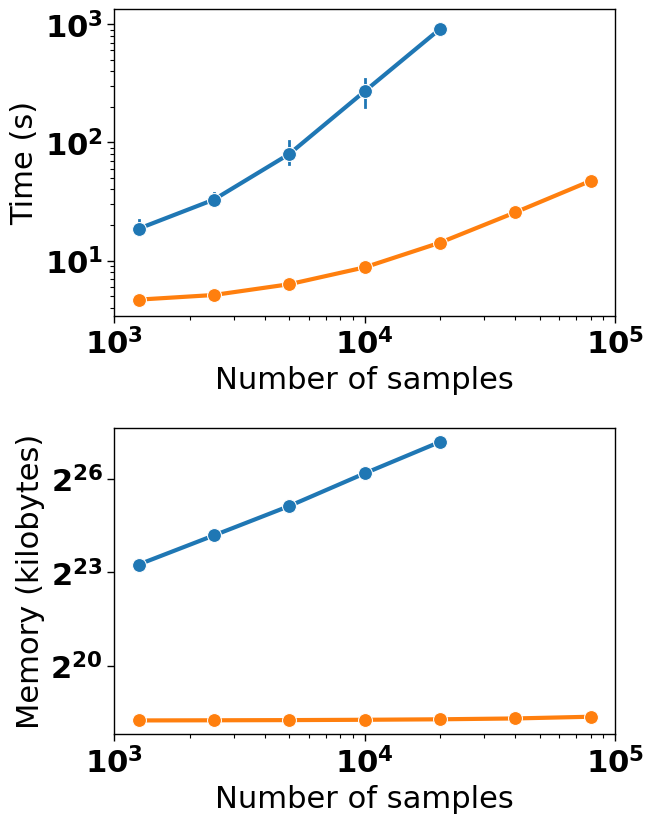

In [98]:
plt.style.use('default')

FONT_SIZE = 22
paper_rc = {'lines.linewidth': 2, 
            'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)   
plt.rcParams['xtick.labelsize'] = FONT_SIZE
plt.rcParams['ytick.labelsize'] = FONT_SIZE
font = {'weight' : 'bold',
        'size'   : FONT_SIZE
       }

mpl.rc('font', **font)

POINT_SIZE=3
x_size = 7
y_size = 2 / 1.61 * x_size
fig, axs = plt.subplots(2, 1,
                        figsize=(x_size, y_size),
                        sharex=False)

ax = sns.lineplot(
    x='sample_size',
    y='Maximum resident set size (kbytes)',
    hue='method',
    data=df_sub,
    marker="o",
    err_style="bars",
    linewidth=POINT_SIZE,

    ci=95,
    hue_order=['skbio', 'stacked'],
    ax=axs[1]
)
ax.legend().remove()
ax.set_yscale('log', basey=2)
ax.set_xscale('log')
ax.set_xbound(1000, 100000)

ax.set_xlabel('Number of samples', size=FONT_SIZE)
ax.set_ylabel('Memory (kilobytes)', size=FONT_SIZE)

plt.legend([],[], frameon=False)

ax = sns.lineplot(
    x='sample_size',
    y='Python time',
    hue='method',
    data=df_sub,
    marker="o",
    err_style="bars",
    ci=95,
    linewidth=POINT_SIZE,
    hue_order=['skbio', 'stacked'],
    ax=axs[0]
)

print(df_sub['sample_size'])

ax.legend().remove()
# NOTE: cannot set aspect ratio
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xbound(1000, 100000)
ax.set_xlabel('Number of samples', size=FONT_SIZE)
ax.set_ylabel('Time (s)', size=FONT_SIZE)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('21-02-17-figures/figure-01-benchmarking-results.png')
plt.show()


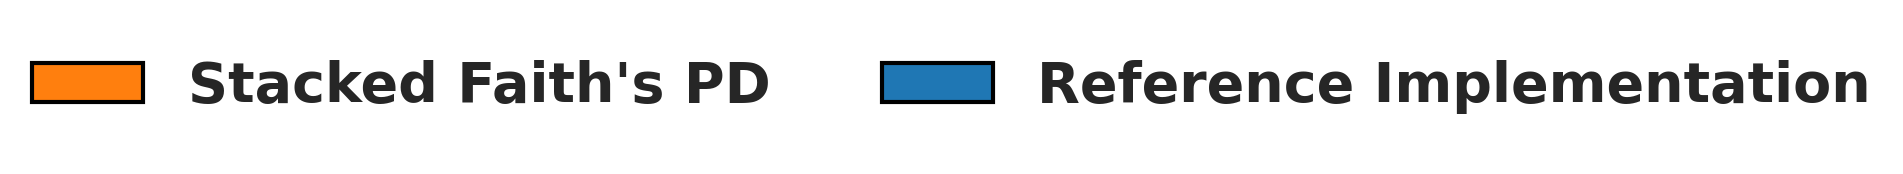

In [27]:
palette = sns.color_palette()

legend_elements = [
    Patch(facecolor=palette[1], edgecolor='black',
          linewidth=3,
          label='Stacked Faith\'s PD',
          ),
    Patch(facecolor=palette[0], edgecolor='black',
          linewidth=3,
          label='Reference Implementation'
          ),
]

# Create the figure
fig, ax = plt.subplots(figsize=(20, 2))
legend = ax.legend(handles=legend_elements, loc='center',
          fontsize=40, ncol=2, framealpha=0.0,
         )
plt.axis('off')
plt.savefig('figures/figure-01-legend.png')
plt.show()
